# Transfer Learning with VGG19

## Import Libraries

In [35]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Flatten

## Data Preprocessing

In [8]:
train_data_dir = 'Dataset/train'
validation_data_dir = 'Dataset/validation'

### Preview Data

In [ ]:
# print("Sample day image:")
# plt.imshow(load_img(f"{os.path.join(day_dir, os.listdir(day_dir)[0])}"))
# plt.show()

# print("\nSample night image:")
# plt.imshow(load_img(f"{os.path.join(night_dir, os.listdir(night_dir)[0])}"))
# plt.show()

### Image Augmentation

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
# Set up the data generator for training and validation
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                              target_size=(150, 150),
                                                              batch_size=32,
                                                              class_mode='categorical')

Found 1079 images belonging to 5 classes.
Found 216 images belonging to 5 classes.


## Modelling

### Pre-Trained Model Load

In [11]:
# Load the pre-trained VGG19 model
vgg19 = tf.keras.applications.VGG19(weights='imagenet',
                                    include_top=False,
                                    input_shape=(150, 150, 3))

# Freeze the weights of the pre-trained layers
for layer in vgg19.layers:
    layer.trainable = False

80134624/80134624 [==============================] - 242s 3us/step


### Fine Tuning

In [21]:
# Add your custom layers on top of the pre-trained model
model = Sequential([
    vgg19,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(5, activation='softmax'),
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Look at model arshitecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dense_9 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 22,123,077
Trainable params: 2,098,693
Non-trainable params: 20,024,384
_________________________________________________________________


In [22]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

Epoch 1/10
34/34 [==============================] - 53s 2s/step - loss: 1.2821 - accuracy: 0.5338 - val_loss: 0.5204 - val_accuracy: 0.7407
Epoch 2/10
34/34 [==============================] - 53s 2s/step - loss: 0.7048 - accuracy: 0.7099 - val_loss: 0.4348 - val_accuracy: 0.8333
Epoch 3/10
34/34 [==============================] - 51s 1s/step - loss: 0.5823 - accuracy: 0.7692 - val_loss: 0.3810 - val_accuracy: 0.8704
Epoch 4/10
34/34 [==============================] - 52s 2s/step - loss: 0.4913 - accuracy: 0.8156 - val_loss: 0.3674 - val_accuracy: 0.8565
Epoch 5/10
34/34 [==============================] - 50s 1s/step - loss: 0.5007 - accuracy: 0.8054 - val_loss: 0.3943 - val_accuracy: 0.8565
Epoch 6/10
34/34 [==============================] - 52s 2s/step - loss: 0.4512 - accuracy: 0.8202 - val_loss: 0.3633 - val_accuracy: 0.8565
Epoch 7/10
34/34 [==============================] - 50s 1s/step - loss: 0.4595 - accuracy: 0.8276 - val_loss: 0.3395 - val_accuracy: 0.8935
Epoch 8/10
34/34 [==

## Model Evaluation

In [32]:
def plot_graghs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

### Accuracy

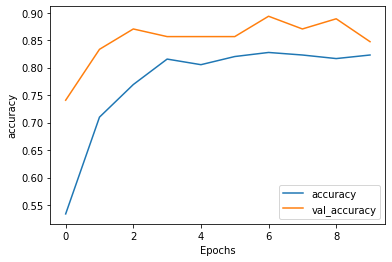

In [33]:
plot_graghs(history, 'accuracy')

### Loss

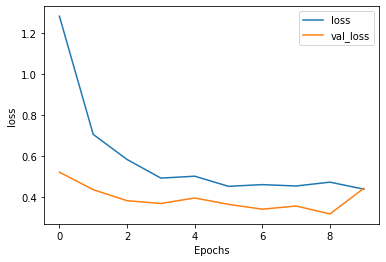

In [34]:
plot_graghs(history, 'loss')

## Model Predictions

In [55]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

label = ['Keyboard', 'Laptop', 'Monitor', 'Mouse', 'Phone']
for fn in os.listdir('test'):
  path = './test/' + fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  for i, l in zip(classes[0], label):
    print("{} : {:.2%}".format(l, i))

1/1 [==============================] - 0s 84ms/step
keyboard.jpg
Keyboard : 87.01%
Laptop : 11.08%
Monitor : 0.07%
Mouse : 0.05%
Phone : 1.79%
1/1 [==============================] - 0s 73ms/step
laptop_0,5_mati.jpg
Keyboard : 0.01%
Laptop : 98.30%
Monitor : 1.69%
Mouse : 0.00%
Phone : 0.01%
1/1 [==============================] - 0s 78ms/step
laptop_hidup.jpg
Keyboard : 0.00%
Laptop : 99.71%
Monitor : 0.29%
Mouse : 0.00%
Phone : 0.00%
1/1 [==============================] - 0s 78ms/step
laptop_mati.jpg
Keyboard : 0.00%
Laptop : 99.09%
Monitor : 0.90%
Mouse : 0.00%
Phone : 0.00%
1/1 [==============================] - 0s 71ms/step
monitor_hidup.jpg
Keyboard : 1.74%
Laptop : 95.63%
Monitor : 2.58%
Mouse : 0.00%
Phone : 0.06%
1/1 [==============================] - 0s 76ms/step
monitor_mati.jpg
Keyboard : 0.04%
Laptop : 7.13%
Monitor : 92.81%
Mouse : 0.00%
Phone : 0.02%
1/1 [==============================] - 0s 78ms/step
mouse.jpg
Keyboard : 0.04%
Laptop : 1.22%
Monitor : 1.56%
Mouse : 92.24%

## Save the Model

In [ ]:
# Save the model
# model.save('e_waste_classifier.h5')